In [1]:

import pandas as pd
import numpy as np
import missingno as msno
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
HCD = pd.read_csv("/content/drive/MyDrive/application_train.csv", index_col = False)

In [3]:
HCD = pd.DataFrame(HCD)
HCD.iloc[:, 0:30].info()
HCD.iloc[:, 30:60].info()
HCD.iloc[:, 60:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [4]:
CodeBook = pd.read_csv("/content/drive/MyDrive/HomeCredit_columns_description.csv", index_col = False, encoding = "Latin-1")
'''
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
Past.iloc[:, [6, 15, 23]]
'''

"\npd.set_option('display.max_columns', None)\npd.set_option('display.max_row', None)\nPast.iloc[:, [6, 15, 23]]\n"

In [5]:
Past = pd.read_csv("/content/drive/MyDrive/previous_application.csv", index_col = False)
Past["NAME_CASH_LOAN_PURPOSE"].unique()
Past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

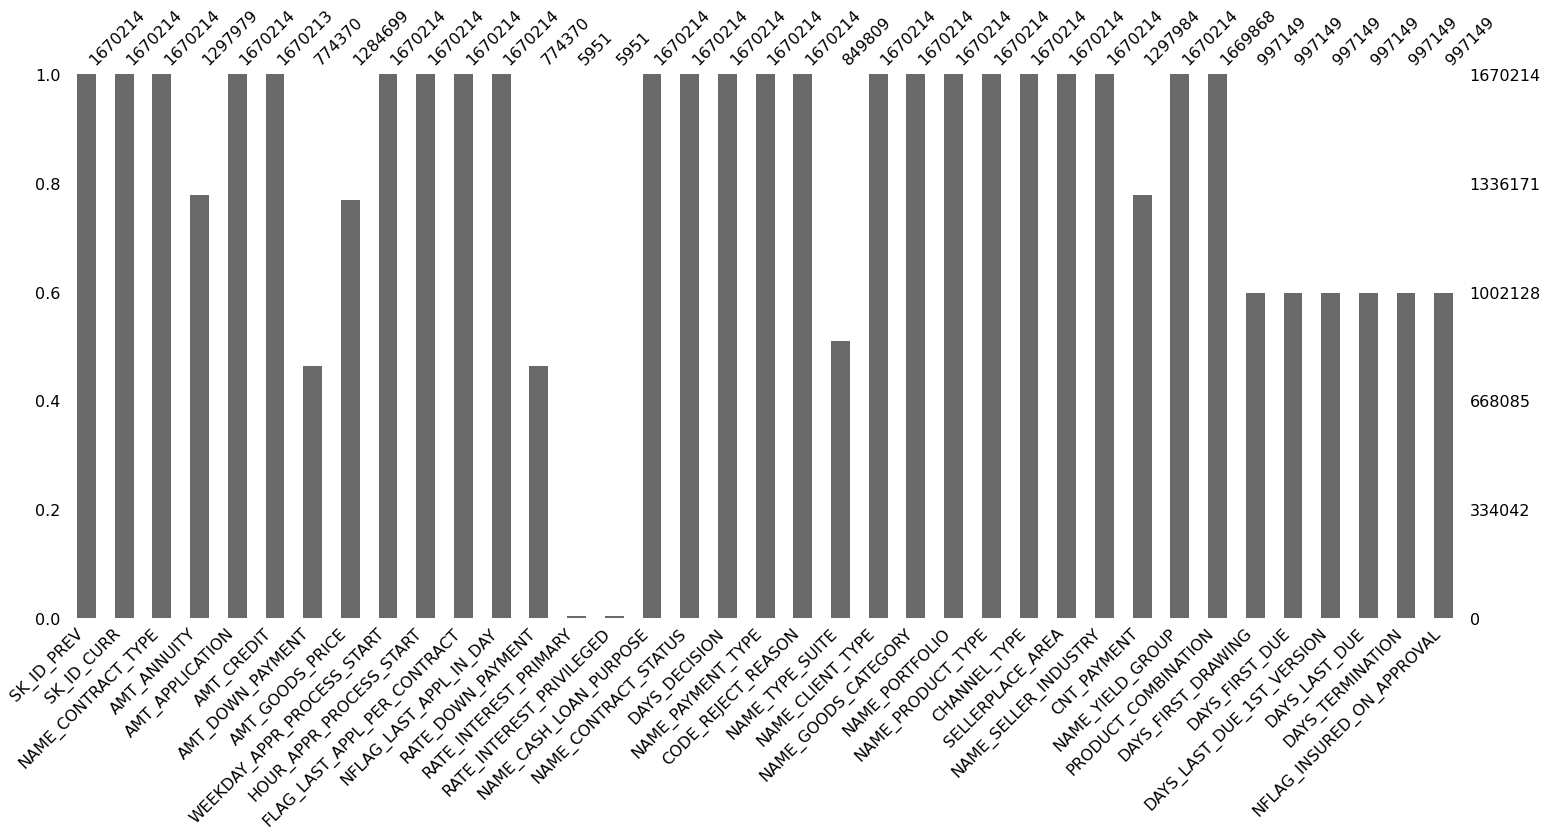

In [6]:
msno.bar(Past)
Past.groupby(["NAME_CASH_LOAN_PURPOSE", "AMT_DOWN_PAYMENT"]).size()
    # [대출목적이 XAP가 아닌 신용대출의 계약금은 모두 0이므로 Down payment > 0인 행 모두 제거]
    # [관측치 삭제] 주택 매매 목적의 신용대출 데이터 제거 이유는 한국의 여신금융상품 체계는 주택담보대출과 신용대출을 구분하고 있기 때문 
Past["AMT_DOWN_PAYMENT"].describe()
    # [Down payment on the previous application]

In [7]:
index = Past[Past["AMT_DOWN_PAYMENT"] != 0].index
Past.drop(index, inplace = True)

In [8]:
Past["AMT_DOWN_PAYMENT"].unique()
    # [대출목적이 XAP가 아닌 신용대출의 계약금은 모두 0이므로 Down payment > 0인 행 모두 제거]

array([0.])

In [9]:
# HCD = HCD.truncate(before = "FLAG_DOCUMENT_21", after = "FLAG_DOCUMENT_2", axis = 1)
    # [ValueError: truncate requires a sorted index]
# HCD.drop(HCD.str.contains("FLAG_DOCUMENT").index, inplace = True)

# [Mutate]
# titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age >= 20 else "child", axis=1)

  ### HCD 제거목록
    # DAYS_REGISTRATION : 19
    # DAYS_ID_PUBLISH
    # FLAG_MOBIL ~ FLAG_EMAIL  # 제거
    # CMT_FAMILY_MEMBERS
    # REGION_RATING_CLINET
    # WEEKDAY_APPR_PROCESS_START
    # HOUR_APPR_PROCESS_START
    # REG_REGION_NOT_LIVE_REGION ~ LIVE_CITY_NOT_WORK_CITY
    # DAYS_LAST_PHONE_CHANGE
    # FLAG_DOCUMENT_2~21
    # AMT_REQ_CREDIT_BUREAU
    # EXT_SOURCE_1~3   # 제거
    # 건물정보(APARTMENTS_AVG ~ ), 
    * HOUSETYPE_MODE 제외(block of flats : 빌라, terraced house : 단독주택, specific housing : 공공주택)

In [10]:
HCD.drop(HCD.filter(like = "FLAG_DOCUMENT"), axis = 1, inplace = True)
HCD.drop(HCD.filter(like = "EXT_SOURCE"), axis = 1, inplace = True)
col_names = HCD.columns.values

In [11]:
values = pd.DataFrame({
    "column" : col_names,
    "number" : range(0, 99)})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
values

,column,number
0,SK_ID_CURR,0
1,TARGET,1
2,NAME_CONTRACT_TYPE,2
3,CODE_GENDER,3
4,FLAG_OWN_CAR,4
5,FLAG_OWN_REALTY,5
6,CNT_CHILDREN,6
7,AMT_INCOME_TOTAL,7
8,AMT_CREDIT,8
9,AMT_ANNUITY,9


In [12]:
HCD["OBS_30_CNT_SOCIAL_CIRCLE"].head()
HCD["REG_REGION_NOT_LIVE_REGION"].unique()
HCD["REGION_RATING_CLIENT_W_CITY"].unique()
HCD['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
HCD.columns.get_loc("DAYS_REGISTRATION")

19

In [14]:
list = []
for i in range(0, 19, 1):
  list.append(i)
for i in [21, 28, 31, 40, 84]:
  list.append(i)
for i in range(88, 93, 1):
  list.append(i)
print(list, end = " ")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 28, 31, 40, 84, 88, 89, 90, 91, 92] 

In [15]:
HCD = HCD.iloc[ : , list]
    # [index location]

In [16]:
HCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
    # [PANDAS] get column number from colomn name
    # dataframe.columns.get_loc("<col_name>")

### Past 제거 목록
    # AMT_DOWN_PAYMENT [, 6]
    # WEEKDAY ~ HOUR [, [8,9]]
    # FLAG_LAST_APPL ~ [, [10,11]]NFLAG_LAST_APPL_IN_DAT
    # RATE_DOWN_PAYMENT [, 12]
    # DAYS_DESCION [, 17]
    # NAME_TYPE_SUITE [, 20]
    # NAME_PORTFOLIO [, 23]
    # CHANNEL_TYPE [, 25]
    # NAME_PRODUCT_TYPE (알 수 없음) [, 24]
    # SELLERPLACE_AREA [, 26]
    # CNT_PAYMENT (단위알수없음) [, 28]
    # DAYS~ [, 31:35]
    * NAMED_YEILD_GROUP - 기준금리, 가상금리

In [18]:
# [Error] KeyError: '[6 8 9 10 11 12 17 20 23 24 25 26 28 31 32 33 34 35] not found in axis'
# Past.drop(columns = [6, 8, 9, 10, 11, 12, 17, 20, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35])

col_names = 0
col_names = Past.iloc[:, [6, 8, 9, 10, 11, 12, 17, 20, 23, 24, 25, 26, 28, 31, 32, 33, 34, 35]].columns.values
col_names

array(['AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'NAME_TYPE_SUITE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype=object)

In [19]:
for i in col_names:
  Past.drop(i, axis = 1, inplace = True)

In [20]:
Past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369854 entries, 0 to 1670209
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 369854 non-null  int64  
 1   SK_ID_CURR                 369854 non-null  int64  
 2   NAME_CONTRACT_TYPE         369854 non-null  object 
 3   AMT_ANNUITY                336466 non-null  float64
 4   AMT_APPLICATION            369854 non-null  float64
 5   AMT_CREDIT                 369854 non-null  float64
 6   AMT_GOODS_PRICE            369854 non-null  float64
 7   RATE_INTEREST_PRIMARY      979 non-null     float64
 8   RATE_INTEREST_PRIVILEGED   979 non-null     float64
 9   NAME_CASH_LOAN_PURPOSE     369854 non-null  object 
 10  NAME_CONTRACT_STATUS       369854 non-null  object 
 11  NAME_PAYMENT_TYPE          369854 non-null  object 
 12  CODE_REJECT_REASON         369854 non-null  object 
 13  NAME_CLIENT_TYPE           3